**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [ ]:
import numpy as np
from types import SimpleNamespace
from scipy.optimize import minimize_scalar, root
import matplotlib.pyplot as plt

## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [ ]:
#Setting parameters
par = SimpleNamespace()

#Firms
par.A = 1.0
par.gamma = 0.5

#Households
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0

#Government
par.tau = 0.0
par.T = 0.0

#Question 3
par.kappa = 0.1

In [ ]:
#Firm functions
def labor_demand(p):
    return (p * par.A * par.gamma) ** (1 / (1 - par.gamma))

def good_supply(l):
    return par.A * l ** par.gamma

def profit(p):
    return ((1 - par.gamma) / par.gamma) * (p * par.A * par.gamma) ** (1 / (1 - par.gamma))

#Consumer functions
def good_demand_1(p1, p2, l):
    income = l + par.T + profit(p1) + profit(p2)
    return par.alpha * income / p1

def good_demand_2(p1, p2, l):
    income = l + par.T + profit(p1) + profit(p2)
    return (1 - par.alpha) * income / (p2 + par.tau)

def labor_supply(p1, p2):
    #Defining the objective function
    def objective(l):
        c1 = good_demand_1(p1, p2, l)
        c2 = good_demand_2(p1, p2, l)
        return np.log(c1 ** par.alpha * c2 ** (1 - par.alpha)) - par.nu * l ** (1 + par.epsilon) / (1 + par.epsilon)
    
    #Find the labor that maximizes the objective
    result = minimize_scalar(lambda l: -objective(l), bounds=(0, 10), method='bounded')
    return result.x

#Check market clearing conditions
for p1 in np.linspace(0.1, 2.0, 10):
    for p2 in np.linspace(0.1, 2.0, 10):
        #Firm labor demand
        labor_demand_1 = labor_demand(p1)
        labor_demand_2 = labor_demand(p2)

        #Firm good supply
        good_supply_1 = good_supply(labor_demand_1)
        good_supply_2 = good_supply(labor_demand_2)

        #Consumer labor supply
        l = labor_supply(p1, p2)

        #Consumer good demand
        c1 = good_demand_1(p1, p2, l)
        c2 = good_demand_2(p1, p2, l)

        #Market clearing conditions
        LM = l - labor_demand_1 - labor_demand_2
        GM1 = good_supply_1 - c1
        GM2 = good_supply_2 - c2

        #Printing results
        print(f'(p1,p2) = ({p1:.2f},{p2:.2f}) -> Excess supply on Labor Market: {LM:.2f}, Good Market 1: {GM1:.2f}, Good Market 2: {GM2:.2f}')

(p1,p2) = (0.10,0.10) -> Excess supply on Labor Market: 0.99, Good Market 1: -2.96, Good Market 2: -6.97
(p1,p2) = (0.10,0.31) -> Excess supply on Labor Market: 0.96, Good Market 1: -3.00, Good Market 2: -2.13
(p1,p2) = (0.10,0.52) -> Excess supply on Labor Market: 0.91, Good Market 1: -3.09, Good Market 2: -1.14
(p1,p2) = (0.10,0.73) -> Excess supply on Labor Market: 0.82, Good Market 1: -3.23, Good Market 2: -0.68
(p1,p2) = (0.10,0.94) -> Excess supply on Labor Market: 0.70, Good Market 1: -3.42, Good Market 2: -0.38
(p1,p2) = (0.10,1.16) -> Excess supply on Labor Market: 0.56, Good Market 1: -3.66, Good Market 2: -0.17
(p1,p2) = (0.10,1.37) -> Excess supply on Labor Market: 0.40, Good Market 1: -3.95, Good Market 2: -0.00
(p1,p2) = (0.10,1.58) -> Excess supply on Labor Market: 0.20, Good Market 1: -4.31, Good Market 2: 0.14
(p1,p2) = (0.10,1.79) -> Excess supply on Labor Market: -0.01, Good Market 1: -4.73, Good Market 2: 0.27
(p1,p2) = (0.10,2.00) -> Excess supply on Labor Market: 

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

In [ ]:
#Define function that expresses excess demand given prices
def market_clearing(prices):
    p1, p2 = prices
    labor_demand_1 = labor_demand(p1)
    labor_demand_2 = labor_demand(p2)
    good_supply_1 = good_supply(labor_demand_1)
    l = labor_supply(p1, p2)
    c1 = good_demand_1(p1, p2, l)
    LM = l - labor_demand_1 - labor_demand_2
    GM1 = good_supply_1 - c1
    return [LM, GM1]

#Finding equilibrium prices, with (p1,p2) = (1.0,1.0) as initial guess
result = root(market_clearing, [1.0, 1.0])

#Printing solution
if result.success:
    equilibrium_prices = result.x
    print(f'Equilibrium prices: p1 = {equilibrium_prices[0]:.2f}, p2 = {equilibrium_prices[1]:.2f}')
else:
    print('Equilibrium not found')

Equilibrium prices: p1 = 0.98, p2 = 1.49


Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

In [ ]:
#Function to find equilibrium values for given tau
def find_equilibrium(tau, T):
    par.tau = tau
    par.T = T

    initial_prices = [1.0, 1.0]
    result = root(market_clearing, initial_prices)

    if result.success:
        optimal_prices = result.x
        l = labor_supply(optimal_prices[0], optimal_prices[1])
        c2 = good_demand_2(optimal_prices[0], optimal_prices[1], l)
        return c2, optimal_prices
    else:
        raise ValueError('Equilibrium prices not found')

#Social welfare function given tau
def social_welfare(tau):
    # Initial guess for T
    T = 0
    tolerance = 1e-6
    max_iterations = 10000
    iteration = 0
    
    #Updating T untill converged
    while iteration < max_iterations:
        iteration += 1
        previous_T = T
        c2, optimal_prices = find_equilibrium(tau, T)
        T = tau * c2
        
        if abs(T - previous_T) < tolerance:
            break

    #Final equilibrium with converged T
    c2, optimal_prices = find_equilibrium(tau, T)
    l = labor_supply(optimal_prices[0], optimal_prices[1])
    c1 = good_demand_1(optimal_prices[0], optimal_prices[1], l)
    
    #Utility function
    U = np.log(c1 ** par.alpha * c2 ** (1 - par.alpha)) - par.nu * l ** (1 + par.epsilon) / (1 + par.epsilon)
    #Social welfare function
    SWF = U - par.kappa * c2
    return -SWF  #We minimize the negative of SWF to maximize SWF

#Finding optimal tau
result_tau = minimize_scalar(social_welfare, bounds=(0, 1), method='bounded')

#Printing solution
if result_tau.success:
    optimal_tau = result_tau.x
    print(f'Optimal tau is {optimal_tau:.2f}, which leads to SWF = {-result_tau.fun:.2f}')
else:
    print('Optimal tau not found')

Optimal tau is 0.17, which leads to SWF = -0.66


## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [ ]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [ ]:
np.random.seed(1111)

#Dictionaries
resultsdic = {}
epsilondic = {}
mean = np.zeros(3)

#loop over jobs
for j in par.v: 
    resultsdic[f'results{j}'] = np.zeros(par.K)
    epsilondic[f'epsilon{j}'] = np.random.normal(loc=0, scale=par.sigma, size=par.K)

    for i in range(par.K):
        resultsdic[f'results{j}'][i] = j + epsilondic[f"epsilon{j}"][i]     #utility
    mean[j-1] = np.mean(resultsdic[f"results{j}"])

print(f"The expected utility of jobs {par.v} is {mean}")
print("")
print("What is meant by average realized utility? Across who?")
print("If across 10000 individuals then that's just the same as the expected utility based on 10000 draws which is reported above.")
print("If just for one individual in each job, then it's weird to call it an average, but I can draw it if you'd like:")
actualutil = np.random.normal(loc=0, scale=par.sigma, size=3) + par.v
print(f"The realized utility for one person in jobs {par.v} is {actualutil}")

The expected utility of jobs [1 2 3] is [1.01120537 1.99782087 2.97917864]

What is meant by average realized utility? Across who?
If across 10000 individuals then that's just the same as the expected utility based on 10000 draws which is reported above.
If just for one individual in each job, then it's weird to call it an average, but I can draw it if you'd like:
The realized utility for one person in jobs [1 2 3] is [-0.06966007  3.83399911  1.33793285]


Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

In [ ]:
np.random.seed(2222)

#Dictionaries
friendepsdic = {}
ownepsdic = {}
friendudic = {}
ownudic = {}

utildedic = {}
umaxindexdic = {}
jstardic = {}
expudic = {}
udic = {}

#Arrays for each i in each dictionary
for i in par.F:
    friendepsdic[f"friendeps{i}"] = []
    ownepsdic[f"owneps{i}"] = []
    friendudic[f"friendu{i}"] = []
    ownudic[f"ownu{i}"] = []

    utildedic[f"utilde{i}"] = []
    umaxindexdic[f"umaxindex{i}"] = []
    jstardic[f"jstar{i}"] = []
    expudic[f"expu{i}"] = []
    udic[f"u{i}"] = []

#Loop K times
for K in range(par.K):
    for i in par.F:
        #draw epsilons and calculate associated utility
        friendeps = np.random.normal(loc=0, scale=par.sigma, size=(i, par.J))
        owneps= np.random.normal(loc=0, scale=par.sigma, size=(par.J))
        friendu = friendeps + par.v
        ownu = owneps + par.v
        
        #Save
        friendepsdic[f"friendeps{i}"].append(friendeps)
        ownepsdic[f"owneps{i}"].append(owneps)
        friendudic[f"friendu{i}"].append(friendu)
        ownudic[f"ownu{i}"].append(ownu)

        #calculate more stuff
        utilde = np.mean(friendu, axis=0)   #exp. utility for each job
        umaxindex = np.argmax(utilde)   #index for job w highest utility
        jstar = umaxindex + 1   #job with highest utility
        expu = np.max(utilde)   #expected utility
        u = ownu[umaxindex]     #actual (realized) utility

        #save
        utildedic[f"utilde{i}"].append(utilde)
        umaxindexdic[f"umaxindex{i}"].append(umaxindex)
        jstardic[f"jstar{i}"].append(jstar)
        expudic[f"expu{i}"].append(expu)
        udic[f"u{i}"].append(u)

#Dictionaries
numjdic = {}
meanexpudic= {}
meanudic = {}

for i in par.F:
    #Count jobs
    ones = np.sum(np.array(jstardic[f"jstar{i}"]) == 1)
    twos = np.sum(np.array(jstardic[f"jstar{i}"]) == 2)
    threes=np.sum(np.array(jstardic[f"jstar{i}"]) == 3)
    numjdic[f"numj{i}"] = np.array([ones, twos, threes]) / par.K

    #Get mean utilites
    meanexpudic[f"meanexpu{i}"] = np.mean(np.array(expudic[f"expu{i}"]))
    meanudic[f"meanu{i}"] = np.mean(np.array(udic[f"u{i}"]))

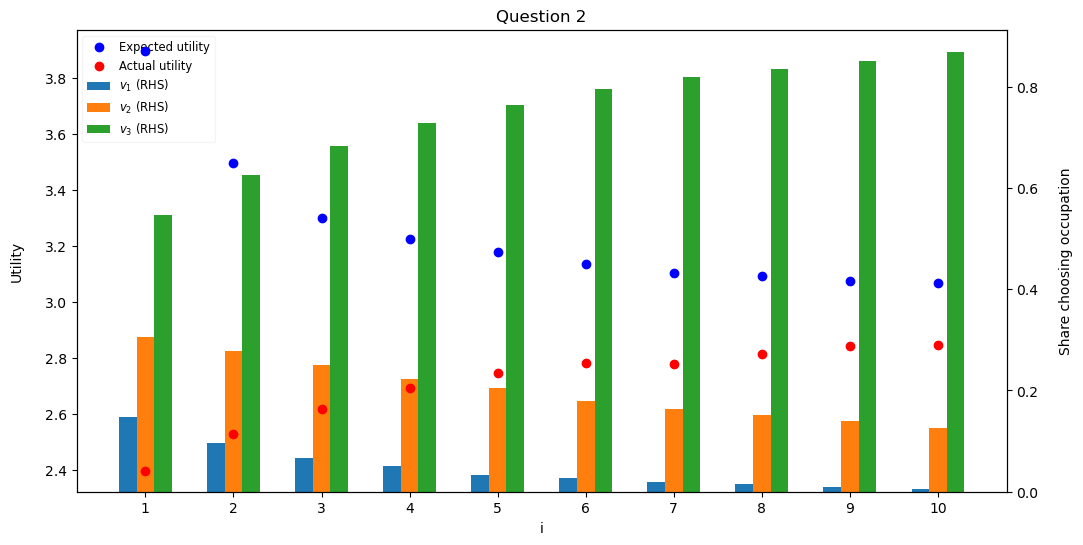

In [ ]:
#Visualize

careerchoice = np.array(list(numjdic.values()))
expudata = np.array(list(meanexpudic.values()))
udata = np.array(list(meanudic.values()))

groups = par.N
bars = par.J

bar_width = 0.2
indices = np.arange(groups)

fig, ax1 = plt.subplots(figsize=(12,6))
ax2 = ax1.twinx()

#Have to swap the y axes so dots are on top of bars, because apparently z-order cant do that ... (want utility on LHS)
ax1.yaxis.tick_right()
ax1.yaxis.set_label_position("right")
ax1.spines['right'].set_position(('outward', 0))

ax2.yaxis.tick_left()
ax2.yaxis.set_label_position("left")
ax2.spines['left'].set_position(('outward', 0))


for i in range(bars):
    ax1.bar(indices + i * bar_width, careerchoice[:, i], bar_width, label=f'$v_{i+1}$ (RHS)', zorder=1)

scatter_expudata = ax2.scatter(indices + bar_width, expudata[:], color='blue', label='Expected utility', zorder=5)
scatter_udata = ax2.scatter(indices + bar_width, udata[:], color='red', label='Actual utility', zorder=6)

ax1.set_xlabel('i')
ax1.set_ylabel('Share choosing occupation', labelpad=15)
ax1.set_title('Question 2')
ax1.set_xticks(indices + bar_width * (bars - 1) / 2)
ax1.set_xticklabels(np.arange(1, groups + 1))
ax2.set_ylabel('Utility', labelpad=15)

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles2 + handles1, labels2 + labels1, fontsize='small', loc='best',framealpha=0.2)

plt.show()

Unsurprisingly, the more information people have, the more often they choose the job with the highest true expected utility, and actual utility and expected utility converge towards each other at 3.

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

In [ ]:
#Dictionaries!

utilde2dic = {}
umaxindex2dic = {}
jstar2dic = {}
expu2dic = {}
u2dic = {}

#Arrays for each i!
for i in par.F:
    utilde2dic[f"utilde2{i}"] = []
    umaxindex2dic[f"umaxindex2{i}"] = []
    jstar2dic[f"jstar2{i}"] = []
    expu2dic[f"expu2{i}"] = []
    u2dic[f"u2{i}"] = []

for i in par.F:
    for K in range(par.K):
        #expected utility for each occupation 
        utilde2 = np.array(utildedic[f"utilde{i}"][K]) - par.c
        utilde2[umaxindexdic[f"umaxindex{i}"][K]] = udic[f"u{i}"][K]
        utilde2dic[f"utilde2{i}"].append(utilde2)
        
        umaxindex2 = np.argmax(utilde2)     #index of best job
        jstar2 = umaxindex2 + 1     #best job
        expu2 = np.max(utilde2)     #exp utility
        #actual utility:
        u2 = ownudic[f"ownu{i}"][K][umaxindex2]
        if umaxindex2 != umaxindexdic[f"umaxindex{i}"][K]:
            u2 = u2 - par.c

        #Save
        umaxindex2dic[f"umaxindex2{i}"].append(umaxindex2)
        jstar2dic[f"jstar2{i}"].append(jstar2)
        expu2dic[f"expu2{i}"].append(expu2)
        u2dic[f"u2{i}"].append(u2)

#Dictionaries
changegivenjdic = {}
meanexpu2dic = {}
meanu2dic = {}

for i in par.F:
    changegivenjdic[f"changegivenj{i}"] = [0,0,0]
    for j in par.v:
        #count share that changes from each job:
        changegivenjdic[f"changegivenj{i}"][j-1] = np.sum((np.array(jstardic[f"jstar{i}"]) == j) & (np.array(jstardic[f"jstar{i}"]) != np.array(jstar2dic[f"jstar2{i}"]))) / np.sum((np.array(jstardic[f"jstar{i}"]) == j))
    
    #mean utilites
    meanexpu2dic[f"meanexpu2{i}"] = np.mean(np.array(expu2dic[f"expu2{i}"]))
    meanu2dic[f"meanu2{i}"] = np.mean(np.array(u2dic[f"u2{i}"]))

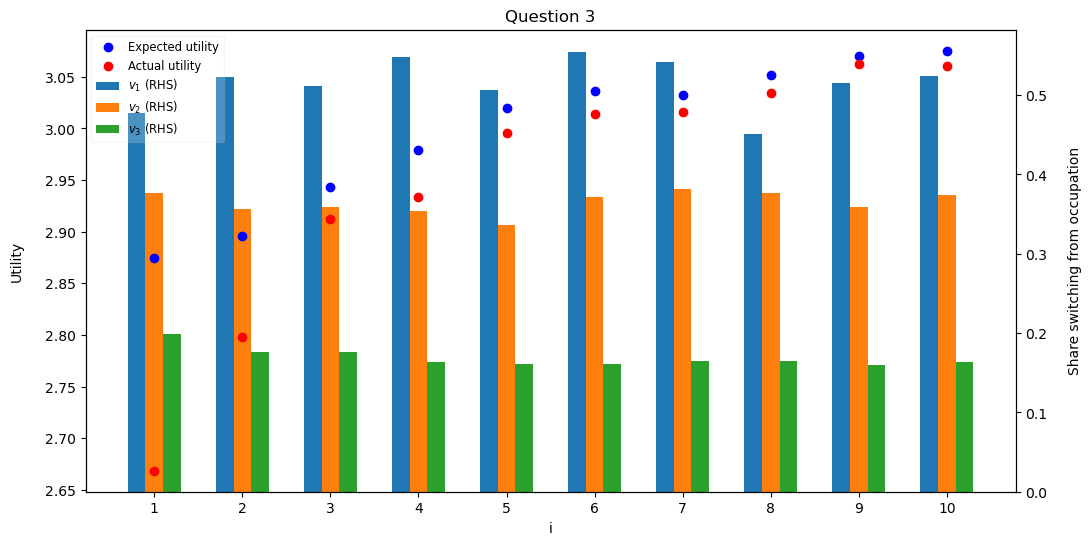

In [ ]:
#Visualize

careerchoice = np.array(list(changegivenjdic.values()))
expudata = np.array(list(meanexpu2dic.values()))
udata = np.array(list(meanu2dic.values()))

groups = par.N
bars = par.J
labels = ["$v_1$", "$v_2$", "$v_3$"]

bar_width = 0.2
indices = np.arange(groups)

fig, ax1 = plt.subplots(figsize=(12,6))
ax2 = ax1.twinx()


ax1.yaxis.tick_right()
ax1.yaxis.set_label_position("right")
ax1.spines['right'].set_position(('outward', 0))

ax2.yaxis.tick_left()
ax2.yaxis.set_label_position("left")
ax2.spines['left'].set_position(('outward', 0))

for i in range(bars):
    ax1.bar(indices + i * bar_width, careerchoice[:, i], bar_width, label=f'$v_{i+1}$ (RHS)', zorder=1)

scatter_expudata = ax2.scatter(indices + bar_width, expudata[:], color='blue', label='Expected utility', zorder=5)
scatter_udata = ax2.scatter(indices + bar_width, udata[:], color='red', label='Actual utility', zorder=6)

scatter_expudata.set_zorder(5)
scatter_udata.set_zorder(6)

ax1.set_xlabel('i')
ax1.set_ylabel('Share switching from occupation', labelpad=15)
ax1.set_title('Question 3')
ax1.set_xticks(indices + bar_width * (bars - 1) / 2)
ax1.set_xticklabels(np.arange(1, groups + 1))
ax2.set_ylabel('Utility', labelpad=15)

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles2 + handles1, labels2 + labels1, fontsize='small', loc='upper left',framealpha=0.2)

plt.show()

It seems that the shares switching jobs is consistent across information. Now (as opposed to in question 2.2), both expected and actual utility are increasing in information. Interestingly, as information increases, the average actual utility goes above 3, which is the true expected utility of the best job. This is because we sort out those that were unlucky in their draw, because they change job, but we dont sort out those that were lucky, because they just keep their job. 

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [ ]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))

**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

In [ ]:
#we define the function
def function(x, y):
    x1, x2 = x
    y1, y2 = y
    return np.sqrt((x1 - y1)**2 + (x2 - y2)**2)

#we find the optimal point given y and the conditions
def find_optimal_point(y, filter_condition):
    filtered_X = np.array([point for point in X if filter_condition(point, y)])
    
    if len(filtered_X) == 0:
        return np.NaN, float('inf')

    min_distance = float('inf')
    optimal_point = np.NaN
    for point in filtered_X:
        dist = function(point, y)
        if dist < min_distance:
            min_distance = dist
            optimal_point = point
    return optimal_point, min_distance

#filter conditions
filter_conditions = {
    "A": lambda point, y: point[0] > y[0] and point[1] > y[1],
    "B": lambda point, y: point[0] > y[0] and point[1] < y[1],
    "C": lambda point, y: point[0] < y[0] and point[1] < y[1],
    "D": lambda point, y: point[0] < y[0] and point[1] > y[1]
}

#running the optimization for the different conditions
result = {}
for key, filter_condition in filter_conditions.items():
    optimal_point, min_distance = find_optimal_point(y, filter_condition)
    result[f"optimal_point_{key}"] = optimal_point
    result[f"min_distance_{key}"] = min_distance

#saving results
A = result["optimal_point_A"]
B = result["optimal_point_B"]
C = result["optimal_point_C"]
D = result["optimal_point_D"]

#printing results
for key in filter_conditions.keys():
    print(f"Point {key}: [{result[f'optimal_point_{key}'][0]:.5f} {result[f'optimal_point_{key}'][1]:.5f}]")

Point A: [0.26072 0.43636]
Point B: [0.21316 0.27425]
Point C: [0.10056 0.27952]
Point D: [0.20634 0.44273]


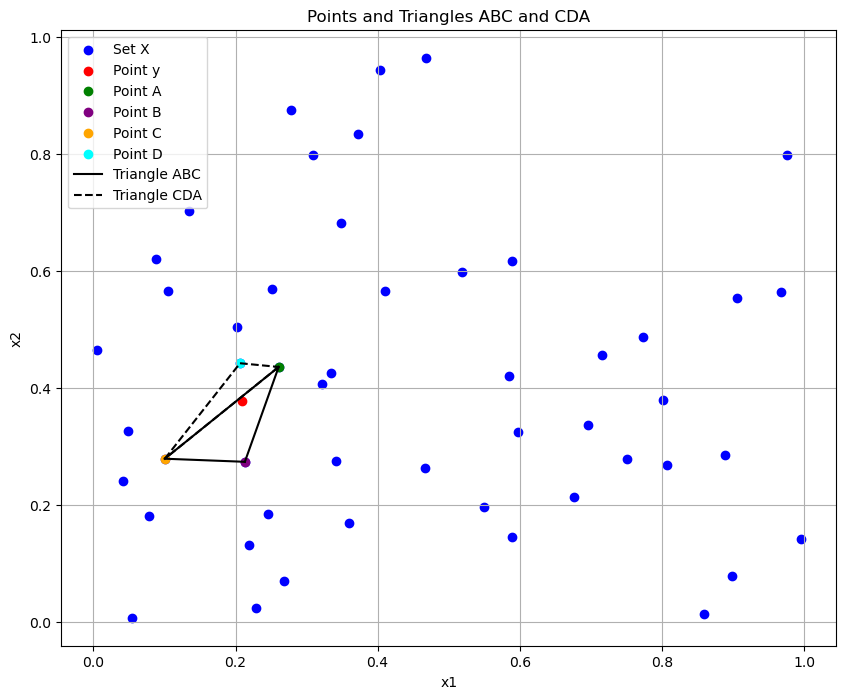

In [ ]:
#plotting the points
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], color='blue', label='Set X')
plt.scatter(y[0], y[1], color='red', label='Point y')

#plotting the triangles 
plt.scatter(A[0], A[1], color='green', label='Point A')
plt.scatter(B[0], B[1], color='purple', label='Point B')
plt.scatter(C[0], C[1], color='orange', label='Point C')
plt.scatter(D[0], D[1], color='cyan', label='Point D')

plt.plot([A[0], B[0]], [A[1], B[1]], 'k-')
plt.plot([B[0], C[0]], [B[1], C[1]], 'k-')
plt.plot([C[0], A[0]], [C[1], A[1]], 'k-', label='Triangle ABC')

plt.plot([C[0], D[0]], [C[1], D[1]], 'k--')
plt.plot([D[0], A[0]], [D[1], A[1]], 'k--')
plt.plot([A[0], C[0]], [A[1], C[1]], 'k--', label='Triangle CDA')

#adding legend and labels
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Points and Triangles ABC and CDA')
plt.grid(True)
plt.show()

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [ ]:
#calculating the barycentric coordinates
r1ABC = ((B[1]-C[1])*(y[0]-C[0])+(C[0]-B[0])*(y[1]-C[1]))/((B[1]-C[1])*(A[0]-C[0])+(C[0]-B[0])*(A[1]-C[1]))
r2ABC = ((C[1]-A[1])*(y[0]-C[0])+(A[0]-C[0])*(y[1]-C[1]))/((B[1]-C[1])*(A[0]-C[0])+(C[0]-B[0])*(A[1]-C[1]))
r3ABC = 1-r1ABC-r2ABC

r1CDA = ((D[1]-A[1])*(y[0]-A[0])+(A[0]-D[0])*(y[1]-A[1]))/((D[1]-A[1])*(C[0]-A[0])+(A[0]-D[0])*(C[1]-A[1]))
r2CDA = ((A[1]-C[1])*(y[0]-A[0])+(C[0]-A[0])*(y[1]-A[1]))/((D[1]-A[1])*(C[0]-A[0])+(A[0]-D[0])*(C[1]-A[1]))
r3CDA = 1-r1CDA-r2CDA

#printing results
print(f"r1ABC: {r1ABC:.5f}, r2ABC: {r2ABC:.5f}, r3ABC: {r3ABC:.5f}")
print(f"r1CDA: {r1CDA:.5f}, r2CDA: {r2CDA:.5f}, r3CDA: {r3CDA:.5f}")
print()
print(f"We can see that the point y is in the triangle ABC, since r1ABC, r2ABC and r3ABC are all in the interval [0,1]")

r1ABC: 0.62863, r2ABC: 0.06910, r3ABC: 0.30227
r1CDA: 0.36826, r2CDA: -0.13393, r3CDA: 0.76567

We can see that the point y is in the triangle ABC, since r1ABC, r2ABC and r3ABC are all in the interval [0,1]


Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [ ]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [ ]:
#calculating the approximation using the algorithm and the true value
approximation = r1ABC*f(A) + r2ABC*f(B) + r3ABC*f(C)
true_value = f(y)

#printing results
print(f"Approximation: {approximation:.5f}, True Value: {true_value:.5f}")
print()
print(f"The approximated value of f(y) is 0.084 which is fairly close to the true value 0.079")

Approximation: 0.08405, True Value: 0.07896

The approximated value of f(y) is 0.084 which is fairly close to the true value 0.079


**Question 4:** Repeat question 3 for all points in the set $Y$.

In [ ]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.2,0.8),(0.5,0.5)]

In [ ]:
#we run the optimization for all points in Y
results = []
for y in Y:
    result = {'y': y}
    for key, filter_condition in filter_conditions.items():
        optimal_point, min_distance = find_optimal_point(y, filter_condition)
        result[f"optimal_point_{key}"] = optimal_point
        result[f"min_distance_{key}"] = min_distance
    A = result["optimal_point_A"]
    B = result["optimal_point_B"]
    C = result["optimal_point_C"]
    D = result["optimal_point_D"]
    if A is not np.NaN and B is not np.NaN and C is not np.NaN:
        result["r1ABC"] = ((B[1]-C[1])*(y[0]-C[0])+(C[0]-B[0])*(y[1]-C[1]))/((B[1]-C[1])*(A[0]-C[0])+(C[0]-B[0])*(A[1]-C[1]))
        result["r2ABC"] = ((C[1]-A[1])*(y[0]-C[0])+(A[0]-C[0])*(y[1]-C[1]))/((B[1]-C[1])*(A[0]-C[0])+(C[0]-B[0])*(A[1]-C[1]))
        result["r3ABC"] = 1-result["r1ABC"]-result["r2ABC"]
    else:
        result["r1ABC"] = result["r2ABC"] = result["r3ABC"] = np.NaN
    if C is not np.NaN and D is not np.NaN and A is not np.NaN:
        result["r1CDA"] = ((D[1]-A[1])*(y[0]-A[0])+(A[0]-D[0])*(y[1]-A[1]))/((D[1]-A[1])*(C[0]-A[0])+(A[0]-D[0])*(C[1]-A[1]))
        result["r2CDA"] = ((A[1]-C[1])*(y[0]-A[0])+(C[0]-A[0])*(y[1]-A[1]))/((D[1]-A[1])*(C[0]-A[0])+(A[0]-D[0])*(C[1]-A[1]))
        result["r3CDA"] = 1-result["r1CDA"]-result["r2CDA"]
    else:
        result["r1CDA"] = result["r2CDA"] = result["r3CDA"] = np.NaN
    if result["r1ABC"] is not np.NaN and result["r2ABC"] is not np.NaN and result["r3ABC"] is not np.NaN and result["r1CDA"] is not np.NaN and result["r2CDA"] is not np.NaN and result["r3CDA"] is not np.NaN:
        if 0 <= result["r1ABC"] <= 1 and 0 <= result["r2ABC"] <= 1 and 0 <= result["r3ABC"] <= 1:
            result["approx"] = r1ABC*f(A) + r2ABC*f(B) + r3ABC*f(C)
        else:
            result["approx"] = r1CDA*f(C) + r2CDA*f(D) + r3CDA*f(A)
    else:
        result["approx"] = np.NaN
    result["tv"] = f(y)
    results.append(result)

#printing results
for result in results:
    print(f"y = {result['y']}")
    for key in filter_conditions.keys():
        if result[f'optimal_point_{key}'] is not np.NaN:
            print(f"Point {key}: [{result[f'optimal_point_{key}'][0]:.5f} {result[f'optimal_point_{key}'][1]:.5f}]")
        else:
            print(f"Point {key}: NaN")
    if result['r1ABC'] is not np.NaN and result['r1ABC'] is not np.NaN and result['r1ABC'] is not np.NaN:
        print(f"r1ABC: {result['r1ABC']:.5f}, r2ABC: {result['r2ABC']:.5f}, r3ABC: {result['r3ABC']:.5f}")
    else:
        print(f"r1ABC: NaN, r2ABC: NaN, r3ABC: NaN")
    if result['r1CDA'] is not np.NaN and result['r1CDA'] is not np.NaN and result['r1CDA'] is not np.NaN:
        print(f"r1CDA: {result['r1CDA']:.5f}, r2CDA: {result['r2CDA']:.5f}, r3CDA: {result['r3CDA']:.5f}")
    else:
        print(f"r1CDA: NaN, r2CDA: NaN, r3CDA: NaN")
    if result['approx'] is not np.NaN:
        print(f"Approximation: {result['approx']:.5f}")
    else:
        print(f"Approximation: NaN")
    if result['tv'] is not np.NaN:
        print(f"True Value: {result['tv']:.5f}")
    else:
        print(f"True Value: NaN")
    print()

y = (0.2, 0.2)
Point A: [0.21316 0.27425]
Point B: [0.24520 0.18479]
Point C: [0.07873 0.18082]
Point D: [0.10056 0.27952]
r1ABC: 0.18055, r2ABC: 0.58268, r3ABC: 0.23678
r1CDA: 0.75074, r2CDA: -0.77947, r3CDA: 1.02873
Approximation: 0.04418
True Value: 0.04000

y = (0.8, 0.2)
Point A: [0.80718 0.26837]
Point B: [0.89823 0.07903]
Point C: [0.58908 0.14639]
Point D: [0.75117 0.27987]
r1ABC: 0.58742, r2ABC: 0.26785, r3ABC: 0.14474
r1CDA: 0.41876, r2CDA: -1.50239, r3CDA: 2.08363
Approximation: 0.16715
True Value: 0.16000

y = (0.8, 0.8)
Point A: NaN
Point B: [0.97562 0.79943]
Point C: [0.58876 0.61681]
Point D: [0.46802 0.96493]
r1ABC: NaN, r2ABC: NaN, r3ABC: NaN
r1CDA: NaN, r2CDA: NaN, r3CDA: NaN
Approximation: NaN
True Value: 0.64000

y = (0.2, 0.8)
Point A: [0.27804 0.87496]
Point B: [0.30945 0.79947]
Point C: [0.13482 0.70289]
Point D: NaN
r1ABC: 0.65756, r2ABC: -0.16604, r3ABC: 0.50848
r1CDA: NaN, r2CDA: NaN, r3CDA: NaN
Approximation: NaN
True Value: 0.16000

y = (0.5, 0.5)
Point A: [